In [61]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
from sklearn.utils import resample

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
df = pd.read_csv('delhi_weather_data.csv')
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,13.7,6.9,21.1,NaN,NaN,NaN,2.9,NaN,1014.5,NaN
1,2018-01-02,12.6,8.9,18.3,NaN,NaN,NaN,5.1,NaN,1015.0,NaN
2,2018-01-03,11.6,8.9,16.9,NaN,NaN,NaN,7.2,NaN,1015.7,NaN
3,2018-01-04,11.8,5.9,22.1,NaN,NaN,NaN,6.6,NaN,1015.7,NaN
4,2018-01-05,12.6,8.9,22.1,NaN,NaN,114.0,7.7,NaN,NaN,NaN


In [64]:
# Check if 'snow' column exists before dropping
if 'snow' in df.columns:
    df.drop(['snow'], axis=1, inplace=True)
df.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,13.7,6.9,21.1,NaN,NaN,2.9,NaN,1014.5,NaN
1,2018-01-02,12.6,8.9,18.3,NaN,NaN,5.1,NaN,1015.0,NaN
2,2018-01-03,11.6,8.9,16.9,NaN,NaN,7.2,NaN,1015.7,NaN
3,2018-01-04,11.8,5.9,22.1,NaN,NaN,6.6,NaN,1015.7,NaN
4,2018-01-05,12.6,8.9,22.1,NaN,114.0,7.7,NaN,NaN,NaN


In [65]:
# Check if 'snow' column exists before dropping
if 'wpgt' in df.columns:
    df.drop(['wpgt'], axis=1, inplace=True)
df.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres,tsun
0,2018-01-01,13.7,6.9,21.1,NaN,NaN,2.9,1014.5,NaN
1,2018-01-02,12.6,8.9,18.3,NaN,NaN,5.1,1015.0,NaN
2,2018-01-03,11.6,8.9,16.9,NaN,NaN,7.2,1015.7,NaN
3,2018-01-04,11.8,5.9,22.1,NaN,NaN,6.6,1015.7,NaN
4,2018-01-05,12.6,8.9,22.1,NaN,114.0,7.7,NaN,NaN


In [66]:
# Check if 'snow' column exists before dropping
if 'tsun' in df.columns:
    df.drop(['tsun'], axis=1, inplace=True)
df.head()


,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2018-01-01,13.7,6.9,21.1,NaN,NaN,2.9,1014.5
1,2018-01-02,12.6,8.9,18.3,NaN,NaN,5.1,1015.0
2,2018-01-03,11.6,8.9,16.9,NaN,NaN,7.2,1015.7
3,2018-01-04,11.8,5.9,22.1,NaN,NaN,6.6,1015.7
4,2018-01-05,12.6,8.9,22.1,NaN,114.0,7.7,NaN


In [67]:
df.shape

(2557, 8)

In [68]:
 df["time"].unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2024-12-29',
       '2024-12-30', '2024-12-31'], dtype=object)

In [69]:
df.columns = df.columns.str.strip()
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2557 non-null   object 
 1   tavg    2557 non-null   float64
 2   tmin    2555 non-null   float64
 3   tmax    2557 non-null   float64
 4   prcp    1420 non-null   float64
 5   wdir    2333 non-null   float64
 6   wspd    2550 non-null   float64
 7   pres    2502 non-null   float64
dtypes: float64(7), object(1)
memory usage: 159.9+ KB


In [71]:
df.isnull().sum()

,0
time,0
tavg,0
tmin,2
tmax,0
prcp,1137
wdir,224
wspd,7
pres,55


In [72]:
df['rain_indicator'] = df['prcp'].map(lambda x: 1 if x > 0.95 else 0)
df['rain_indicator']
rain_indicator_count = df['rain_indicator'].value_counts()
print(rain_indicator_count)

rain_indicator
0    2161
1     396
Name: count, dtype: int64


In [73]:
df

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres,rain_indicator
0,2018-01-01,13.7,6.9,21.1,NaN,NaN,2.9,1014.5,0
1,2018-01-02,12.6,8.9,18.3,NaN,NaN,5.1,1015.0,0
2,2018-01-03,11.6,8.9,16.9,NaN,NaN,7.2,1015.7,0
3,2018-01-04,11.8,5.9,22.1,NaN,NaN,6.6,1015.7,0
4,2018-01-05,12.6,8.9,22.1,NaN,114.0,7.7,NaN,0
...,...,...,...,...,...,...,...,...,...
2552,2024-12-27,15.4,13.0,22.7,10.9,36.0,10.0,1019.5,1
2553,2024-12-28,15.7,12.7,16.9,39.1,322.0,5.2,1019.1,1
2554,2024-12-29,13.6,11.7,16.4,0.0,278.0,12.9,1021.0,0
2555,2024-12-30,12.2,9.9,13.9,0.0,275.0,9.9,1020.4,0


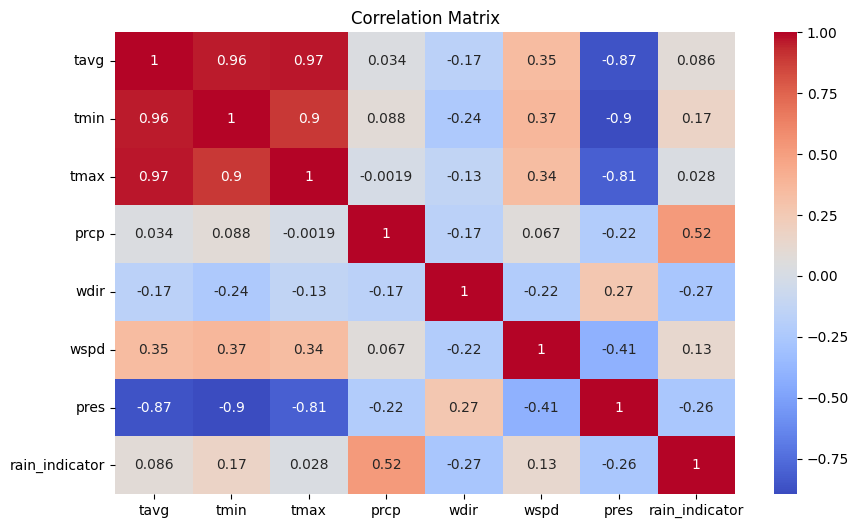

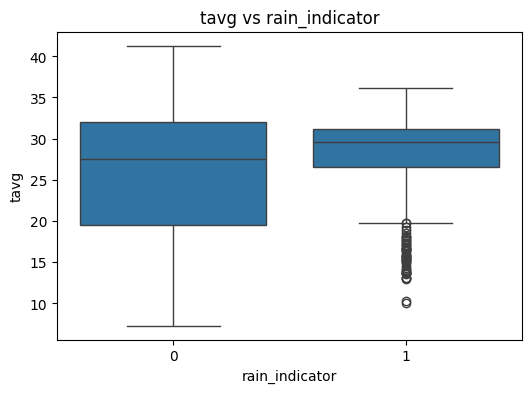

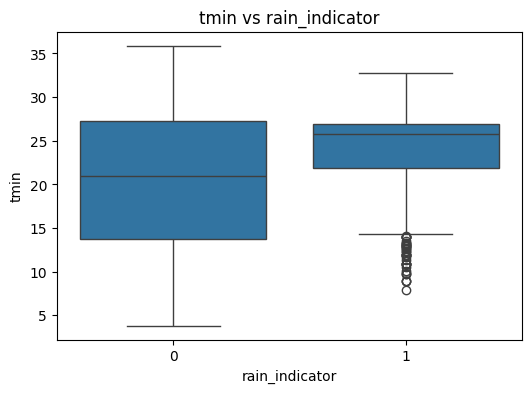

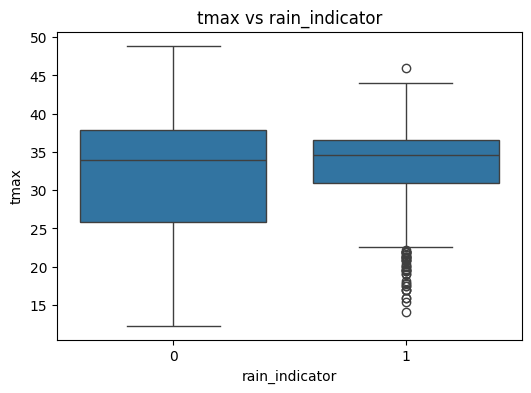

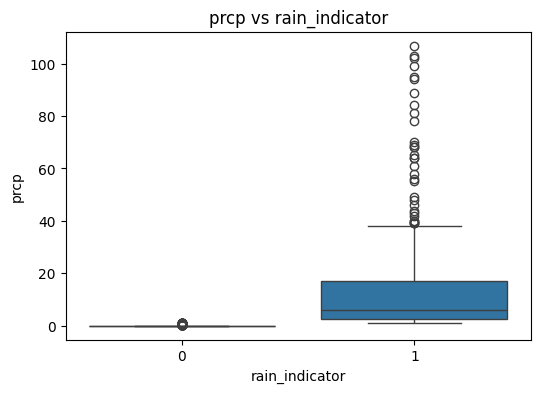

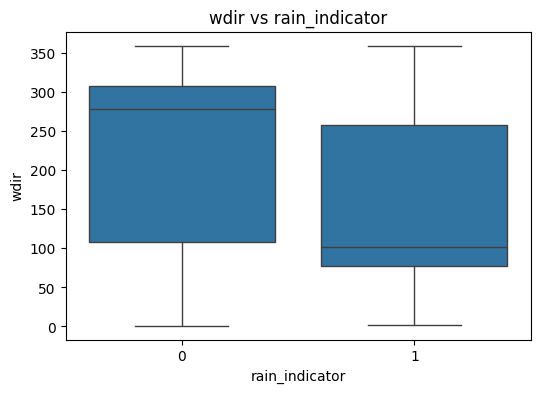

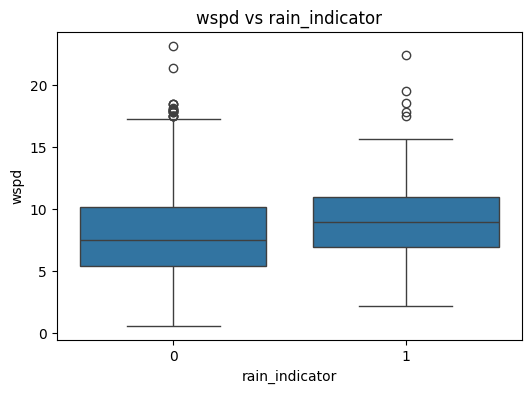

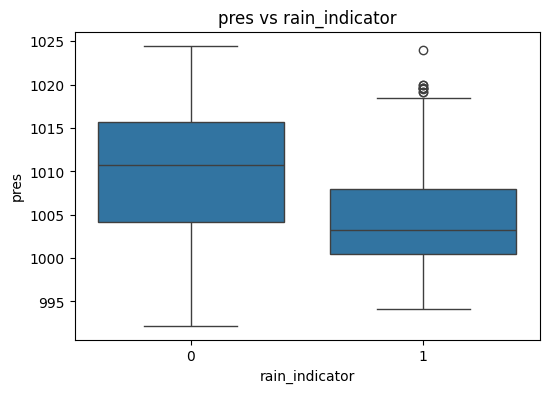

In [74]:
# Correlation Matrix (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplots for each numeric feature vs Rain
numeric_cols = df.select_dtypes(include=np.number).columns.drop('rain_indicator')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='rain_indicator', y=col, data=df)
    plt.title(f"{col} vs rain_indicator")
    plt.show()


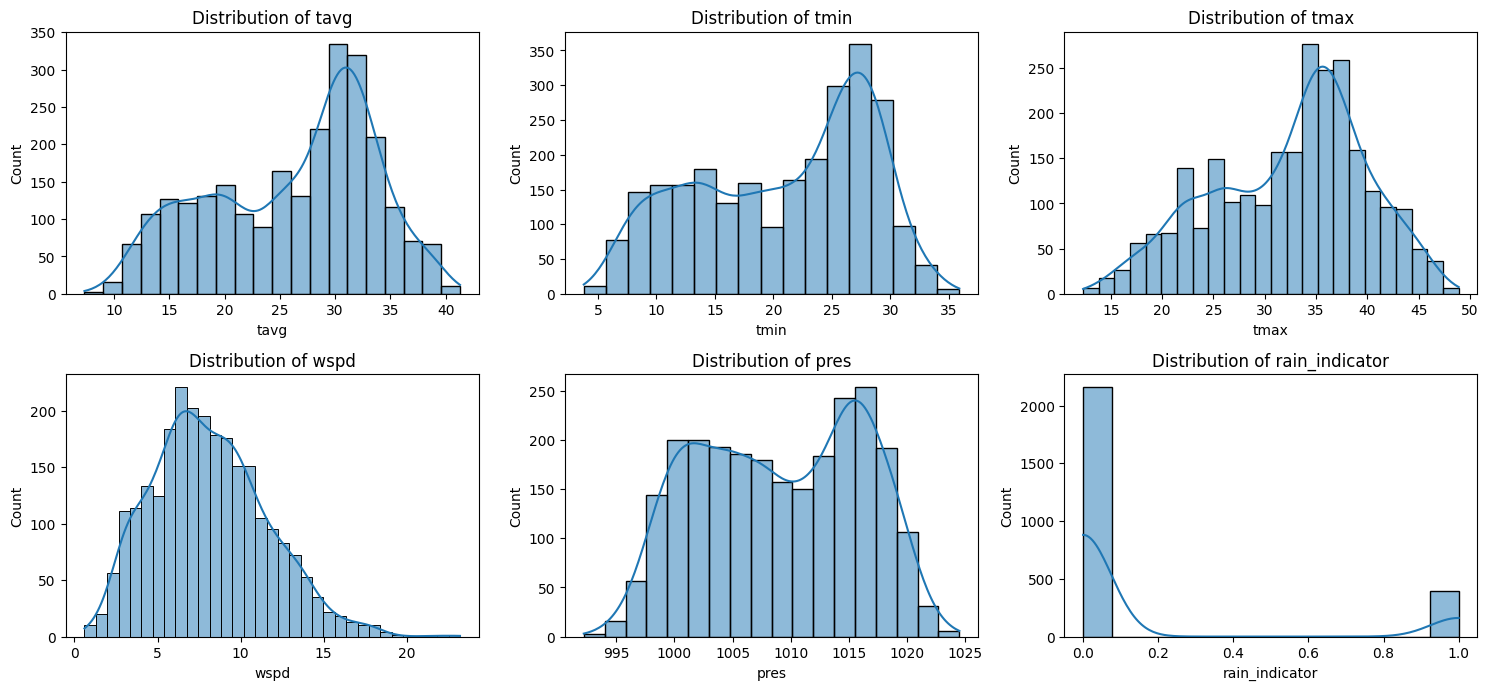

In [75]:
plt.figure(figsize = (15,10))

for i, column in enumerate(['tavg', 'tmin', 'tmax', 'wspd','pres', 'rain_indicator'],1):
  plt.subplot(3,3,i)
  sns.histplot(df[column], kde = True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

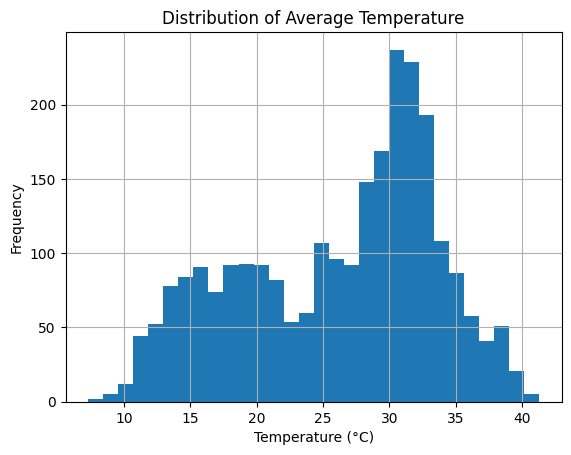

In [76]:
# Histogram of temperature
df['tavg'].hist(bins=30)
plt.title("Distribution of Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

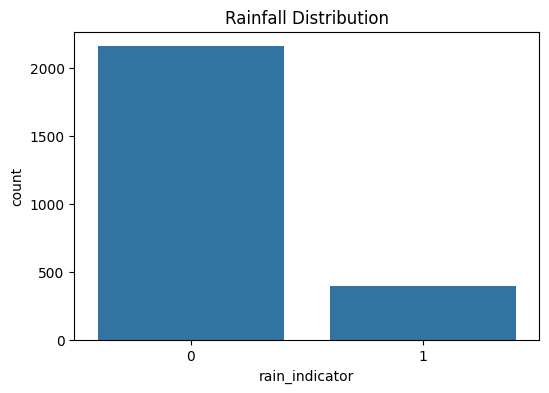

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x="rain_indicator", data=df)
plt.title("Rainfall Distribution")
plt

In [78]:
df = df.drop(columns=["tmax","tmin"])
df

,time,tavg,prcp,wdir,wspd,pres,rain_indicator
0,2018-01-01,13.7,NaN,NaN,2.9,1014.5,0
1,2018-01-02,12.6,NaN,NaN,5.1,1015.0,0
2,2018-01-03,11.6,NaN,NaN,7.2,1015.7,0
3,2018-01-04,11.8,NaN,NaN,6.6,1015.7,0
4,2018-01-05,12.6,NaN,114.0,7.7,NaN,0
...,...,...,...,...,...,...,...
2552,2024-12-27,15.4,10.9,36.0,10.0,1019.5,1
2553,2024-12-28,15.7,39.1,322.0,5.2,1019.1,1
2554,2024-12-29,13.6,0.0,278.0,12.9,1021.0,0
2555,2024-12-30,12.2,0.0,275.0,9.9,1020.4,0


In [79]:
df["rain_indicator"].value_counts()

,count
rain_indicator,
0,2161
1,396


In [80]:
# Separate features and target
X = df.drop('rain_indicator', axis=1)
y = df['rain_indicator']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine for balancing
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data.rain_indicator == 0]
minority = train_data[train_data.rain_indicator == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Concatenate back
balanced_train = pd.concat([majority, minority_upsampled])

# Final training sets
X_train_bal = balanced_train.drop('rain_indicator', axis=1)
y_train_bal = balanced_train['rain_indicator']

# Check balance
print(y_train_bal.value_counts())


rain_indicator
0    1743
1    1743
Name: count, dtype: int64


In [81]:
import pandas as pd

# Convert to DataFrame if it's not already
X_train_bal_df = pd.DataFrame(X_train_bal)

# Check for NaNs
nan_counts = X_train_bal_df.isnull().sum()

# Display only columns with NaNs
nan_columns = nan_counts[nan_counts > 0]
print("Columns with NaN values:\n", nan_columns)

Columns with NaN values:
 prcp    903
wdir    224
wspd     18
pres     70
dtype: int64


In [82]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Drop non-numeric columns (e.g., 'date') from training and test sets
X_train_numeric = X_train_bal_df.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_bal_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)
X_train_n = X_train_bal_imputed + np.random.normal(0, 3, X_train_bal_imputed.shape)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_n, y_train_bal)

# Predict on clean (or also noisy) test set
y_pred_rf = rf.predict(X_test_imputed)

In [83]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Convert to DataFrame if not already
X_train_bal_df = pd.DataFrame(X_train_bal)
X_test_df = pd.DataFrame(X_test)

# Keep only numeric columns
X_train_bal_numeric = X_train_bal_df.select_dtypes(include=[np.number])
X_test_numeric = X_test_df.select_dtypes(include=[np.number])

# Imputer: replace NaN with column mean
imputer = SimpleImputer(strategy='mean')

# Fit on numeric training data and transform both sets
X_train_bal_imputed = imputer.fit_transform(X_train_bal_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

In [84]:
svm = SVC()
svm.fit(X_train_bal_imputed, y_train_bal)
y_pred_svm = svm.predict(X_test_imputed)

In [85]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")

--- Random Forest ---
Accuracy: 0.755859375
Precision: 0.4124293785310734
F1 Score: 0.5387453874538746

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83       418
           1       0.41      0.78      0.54        94

    accuracy                           0.76       512
   macro avg       0.67      0.76      0.69       512
weighted avg       0.84      0.76      0.78       512

--- SVM ---
Accuracy: 0.666015625
Precision: 0.3140096618357488
F1 Score: 0.4318936877076412

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.66      0.76       418
           1       0.31      0.69      0.43        94

    accuracy                           0.67       512
   macro avg       0.61      0.68      0.60       512
weighted avg       0.80      0.67      0.70       512



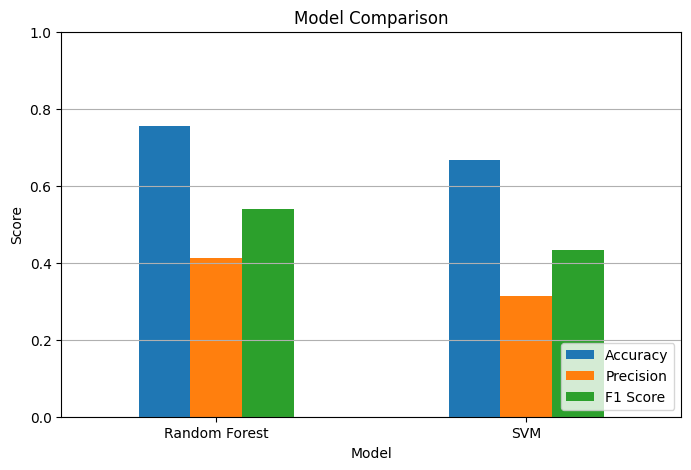

In [86]:
# Store metrics
metrics = {
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm)],
    'F1 Score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm)]
}

metrics_df = pd.DataFrame(metrics)

# Plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(8,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [87]:
input_data = {
    'tavg': 30,
    'prcp': 40,
    'wdir': 139,
    'wspd' : 5,
    'pres': 1010,

}

input_df = pd.DataFrame([input_data])
prediction = rf.predict(input_df)[0]

print("Prediction:", "Rain " if prediction == 1 else "No Rain ")

Prediction: Rain 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [88]:
input_data = {
    'tavg': 28,
    'prcp': 0,
    'wdir': 90,
    'wspd': 2,
    'pres': 1015,
}

input_df = pd.DataFrame([input_data])
prediction = rf.predict(input_df)[0]

print("Prediction:", "Rain" if prediction == 1 else "No Rain")

Prediction: No Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [90]:
import pandas as pd
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [93]:
import pandas as pd
import numpy as np
import pickle

# Load the saved model
loaded_model = pickle.load(open('finalized_model.pkl', 'rb'))

def predict_rain(tavg, prcp, wdir, wspd, pres):
    input_data = {
        'tavg': tavg,
        'prcp': prcp,
        'wdir': wdir,
        'wspd': wspd,
        'pres': pres
    }
    input_df = pd.DataFrame([input_data])
    prediction = loaded_model.predict(input_df)[0]
    return "Rain" if prediction == 1 else "No Rain"

# Example usage with user input
tavg = float(input("Enter average temperature: "))
prcp = float(input("Enter precipitation: "))
wdir = float(input("Enter wind direction: "))
wspd = float(input("Enter wind speed: "))
pres = float(input("Enter pressure: "))

prediction = predict_rain(tavg, prcp, wdir, wspd, pres)
print("Prediction:", prediction)


Enter average temperature: 40
Enter precipitation: 0
Enter wind direction: 20
Enter wind speed: 20
Enter pressure: 1010
Prediction: No Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
